This notebook correlates the sharptack data with Neuropixels data

## Load sharptrack data

In [90]:
from pathlib import Path
import pandas as pd
from tqdm.auto import tqdm
import xarray as xr
import seaborn as sns
import matplotlib.pylab as plt
import seaborn.objects as so
import numpy as np

In [5]:
base_path  = Path('/home/MRC.OX.AC.UK/ndcn1330/ettin/') # change it to your ettin path
sharp_track_path = base_path/Path('Kouichi Nakamura/Analysis/Images from Otto/20230406 kms058')/'Tapdvml_contacts.xlsx'

In [6]:
df_sharptrack = pd.read_excel(sharp_track_path)
df_sharptrack

,ap_mm,dv_mm,dv_mm_paxinos,ml_mm,annotation,name,acronym,contact_id,probe_id,depth_mm,depth_mm_paxinos,probe_AB,session_id,subject_id,probe_note,name_with_margin
0,0.150000,3.700000,2.573700,-2.820000,574,Caudoputamen,CP,1,1,2.182211,1.963423,optic fiber,NaN,NaN,NaN,boundary
1,0.150000,3.700000,2.573700,-2.820000,574,Caudoputamen,CP,2,1,2.182211,1.963423,optic fiber,NaN,NaN,NaN,boundary
2,0.153239,3.680359,2.555611,-2.822821,574,Caudoputamen,CP,3,1,2.162211,1.945428,optic fiber,NaN,NaN,NaN,boundary
3,0.153239,3.680359,2.555611,-2.822821,574,Caudoputamen,CP,4,1,2.162211,1.945428,optic fiber,NaN,NaN,NaN,boundary
4,0.156477,3.660719,2.537522,-2.825641,574,Caudoputamen,CP,5,1,2.142211,1.927434,optic fiber,NaN,NaN,NaN,Caudoputamen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3451,-2.943504,1.882591,0.899866,-1.410000,536,Subiculum,SUB,380,9,1.693483,1.554616,B,kms058-2023-03-14-165110,NaN,NaN,Subiculum
3452,-2.941883,1.862552,0.881410,-1.410000,536,Subiculum,SUB,381,9,1.673483,1.536256,B,kms058-2023-03-14-165110,NaN,NaN,Subiculum
3453,-2.941883,1.862552,0.881410,-1.410000,536,Subiculum,SUB,382,9,1.673483,1.536256,B,kms058-2023-03-14-165110,NaN,NaN,Subiculum
3454,-2.940261,1.842512,0.862954,-1.410000,536,Subiculum,SUB,383,9,1.653483,1.517896,B,kms058-2023-03-14-165110,NaN,NaN,Subiculum


### Load neuropixel results

In [7]:
path = base_path/Path('Julien/Data/head-fixed/by_sessions/reaching_go_spout_bar_nov22')
files = list(Path(path).glob('kms058*/processed/xr_spikes_trials.nc'))
files

[PosixPath('/home/MRC.OX.AC.UK/ndcn1330/ettin/Julien/Data/head-fixed/by_sessions/reaching_go_spout_bar_nov22/kms058-2023-03-24-151254/processed/xr_spikes_trials.nc'),
 PosixPath('/home/MRC.OX.AC.UK/ndcn1330/ettin/Julien/Data/head-fixed/by_sessions/reaching_go_spout_bar_nov22/kms058-2023-03-25-184034/processed/xr_spikes_trials.nc'),
 PosixPath('/home/MRC.OX.AC.UK/ndcn1330/ettin/Julien/Data/head-fixed/by_sessions/reaching_go_spout_bar_nov22/kms058-2023-03-20-132658/processed/xr_spikes_trials.nc'),
 PosixPath('/home/MRC.OX.AC.UK/ndcn1330/ettin/Julien/Data/head-fixed/by_sessions/reaching_go_spout_bar_nov22/kms058-2023-03-14-165110/processed/xr_spikes_trials.nc'),
 PosixPath('/home/MRC.OX.AC.UK/ndcn1330/ettin/Julien/Data/head-fixed/by_sessions/reaching_go_spout_bar_nov22/kms058-2023-03-23-191740/processed/xr_spikes_trials.nc')]

In [8]:
# extract the firing rate and maxwaveformCh from the xr_spikes_trials.nc xarray dataset
data_list = []
for i in tqdm(range(len(files))):
    dataset = xr.open_dataset(files[i])
    da = dataset[['firingRate','maxWaveformCh1']]
    data_list.append(da)

cell_da = xr.merge(data_list)


  0%|          | 0/5 [00:00<?, ?it/s]

In [9]:
# content of the one xr_spikes_trial
dataset

<xarray.Dataset>
Dimensions:                                 (cluID: 672, wide_idx: 1001,
                                             narrow_idx: 201, log10_idx: 100,
                                             labels_d1: 0,
                                             responseCurves_meanCCG_d1: 51,
                                             responseCurves_firingRateAcrossTime_d1: 39,
                                             waveforms_filt_std_d1: 48,
                                             ...
                                             timeWaveform_all_d1: 72,
                                             channels_all_d1: 384,
                                             peakVoltage_sorted_d1: 384,
                                             maxWaveform_all_d1: 384,
                                             trial_nb: 170, trial_phase: 6,
                                             spk_event_time: 251)
Coordinates: (12/36)
  * cluID                                   (cluID) object 'kms058-2023-03-23...
  * wide_idx                                (wide_idx) int64 0 1 2 ... 999 1000
  * narrow_idx                              (narrow_idx) int64 0 1 2 ... 199 200
  * log10_idx                               (log10_idx) int64 0 1 2 ... 97 98 99
  * labels_d1                               (labels_d1) int64 
  * responseCurves_meanCCG_d1               (responseCurves_meanCCG_d1) int64 ...
    ...                                      ...
  * channels_all_d1                         (channels_all_d1) int64 0 1 ... 383
  * peakVoltage_sorted_d1                   (peakVoltage_sorted_d1) int64 0 ....
  * maxWaveform_all_d1                      (maxWaveform_all_d1) int64 0 ... 383
  * trial_nb                                (trial_nb) float64 1.0 2.0 ... 170.0
  * trial_phase                             (trial_phase) object 'trial_onset...
  * spk_event_time                          (spk_event_time) float64 -500.0 ....
Data variables: (12/89)
    ab_ratio                                (cluID) float64 ...
    acg_wide                                (wide_idx, cluID) float64 ...
    acg_narrow                              (narrow_idx, cluID) float64 ...
    acg_log10                               (log10_idx, cluID) float64 ...
    acg_asymptote                           (cluID) float64 ...
    acg_c                                   (cluID) float64 ...
    ...                                      ...
    spikes_FR.first_spout                   (trial_nb, spk_event_time, cluID) float64 ...
    spikes_zFR.first_spout                  (trial_nb, spk_event_time, cluID) float64 ...
    spikes_FR.reward                        (trial_nb, spk_event_time, cluID) float64 ...
    spikes_zFR.reward                       (trial_nb, spk_event_time, cluID) float64 ...
    spikes_FR.pre-cue1000                   (trial_nb, spk_event_time, cluID) float64 ...
    spikes_zFR.pre-cue1000                  (trial_nb, spk_event_time, cluID) float64 ...
Attributes: (12/16)
    chanCoords_x:                             [16 48  0 32 16 48  0 32 16 48 ...
    chanCoords_y:                             [   0    0   20   20   40   40 ...
    chanCoords_source:                        channel_positions.npy
    chanCoords_verticalSpacing:               10
    chanCoords_layout:                        poly2
    putativeConnections_excitatory:           [[ 17  13]\n [413  42]\n [ 44  ...
    ...                                       ...
    task_folder:                              reaching_go_spout_bar_nov22
    probe_names:                              ['ProbeA', 'ProbeB']
    bin_duration:                             10
    sigma_ms:                                 20
    kernel:                                   ExponentialKernel
    trial_window:                             [ 500 2000]

In [10]:
df_cell = cell_da.to_dataframe().reset_index()
df_cell

def get_session_date(session_id):
    if type(session_id) is str:
    # only return the date of the session
        return '-'.join(session_id.split('-')[:-1])

# Convert the dataframe into proper format for merging
# extract the session ID and probe name from the cluID so that we can merge to Sharptrack results
df_cell[['session_id','probe','id']] = df_cell.cluID.str.split('_',expand=True)
df_cell['session_date'] = df_cell['session_id'].apply(get_session_date)
df_cell['probe']  = df_cell['probe'].str.replace('Probe','')
df_cell

,cluID,firingRate,maxWaveformCh1,session_id,probe,id,session_date
0,kms058-2023-03-14-165110_ProbeA_15,0.236153,53.0,kms058-2023-03-14-165110,A,15,kms058-2023-03-14
1,kms058-2023-03-14-165110_ProbeA_52,0.216764,250.0,kms058-2023-03-14-165110,A,52,kms058-2023-03-14
2,kms058-2023-03-14-165110_ProbeA_53,2.261256,270.0,kms058-2023-03-14-165110,A,53,kms058-2023-03-14
3,kms058-2023-03-14-165110_ProbeA_54,0.181044,270.0,kms058-2023-03-14-165110,A,54,kms058-2023-03-14
4,kms058-2023-03-14-165110_ProbeA_57,0.331661,270.0,kms058-2023-03-14-165110,A,57,kms058-2023-03-14
...,...,...,...,...,...,...,...
2778,kms058-2023-03-25-184034_ProbeB_986,0.074024,363.0,kms058-2023-03-25-184034,B,986,kms058-2023-03-25
2779,kms058-2023-03-25-184034_ProbeB_988,0.063241,365.0,kms058-2023-03-25-184034,B,988,kms058-2023-03-25
2780,kms058-2023-03-25-184034_ProbeB_991,0.124315,364.0,kms058-2023-03-25-184034,B,991,kms058-2023-03-25
2781,kms058-2023-03-25-184034_ProbeB_997,0.999803,361.0,kms058-2023-03-25-184034,B,997,kms058-2023-03-25


### Match sharptrack to cluster

In [11]:
# There may be multiple recordings on the same date, but usually only 1 probe penetration
# so here we merge based on the date instead of the sesison_id

df_sharptrack['session_date'] = df_sharptrack['session_id'].apply(get_session_date)

df_cell_merge = df_cell.merge(df_sharptrack, left_on=['session_date','probe','maxWaveformCh1'],
                              right_on = ['session_date', 'probe_AB','contact_id'])
df_cell_merge

,cluID,firingRate,maxWaveformCh1,session_id_x,probe,id,session_date,ap_mm,dv_mm,dv_mm_paxinos,...,acronym,contact_id,probe_id,depth_mm,depth_mm_paxinos,probe_AB,session_id_y,subject_id,probe_note,name_with_margin
0,kms058-2023-03-14-165110_ProbeB_1,0.684621,4.0,kms058-2023-03-14-165110,B,1,kms058-2023-03-14,-3.248378,5.649961,4.369614,...,cpd,4,9,5.453483,5.006292,B,kms058-2023-03-14-165110,NaN,NaN,cerebal peduncle
1,kms058-2023-03-14-165110_ProbeB_100,9.856220,71.0,kms058-2023-03-14-165110,B,100,kms058-2023-03-14,-3.193242,4.968628,3.742106,...,SNr,71,9,4.773483,4.382053,B,kms058-2023-03-14-165110,NaN,NaN,boundary
2,kms058-2023-03-14-165110_ProbeB_103,42.265543,83.0,kms058-2023-03-14-165110,B,103,kms058-2023-03-14,-3.183512,4.848393,3.631370,...,MB,83,9,4.653483,4.271893,B,kms058-2023-03-14-165110,NaN,NaN,Midbrain
3,kms058-2023-03-14-165110_ProbeB_116,24.727193,83.0,kms058-2023-03-14-165110,B,116,kms058-2023-03-14,-3.183512,4.848393,3.631370,...,MB,83,9,4.653483,4.271893,B,kms058-2023-03-14-165110,NaN,NaN,Midbrain
4,kms058-2023-03-14-165110_ProbeB_104,3.466558,85.0,kms058-2023-03-14-165110,B,104,kms058-2023-03-14,-3.181890,4.828353,3.612914,...,MB,85,9,4.633483,4.253533,B,kms058-2023-03-14-165110,NaN,NaN,Midbrain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2763,kms058-2023-03-25-184034_ProbeB_975,0.052044,361.0,kms058-2023-03-25-184034,B,975,kms058-2023-03-25,-3.080993,2.072187,1.074484,...,SUB,361,7,1.835740,1.690233,B,kms058-2023-03-25-184034,NaN,NaN,Subiculum
2764,kms058-2023-03-25-184034_ProbeB_983,0.432562,361.0,kms058-2023-03-25-184034,B,983,kms058-2023-03-25,-3.080993,2.072187,1.074484,...,SUB,361,7,1.835740,1.690233,B,kms058-2023-03-25-184034,NaN,NaN,Subiculum
2765,kms058-2023-03-25-184034_ProbeB_997,0.999803,361.0,kms058-2023-03-25-184034,B,997,kms058-2023-03-25,-3.080993,2.072187,1.074484,...,SUB,361,7,1.835740,1.690233,B,kms058-2023-03-25-184034,NaN,NaN,Subiculum
2766,kms058-2023-03-25-184034_ProbeB_966,0.185213,366.0,kms058-2023-03-25-184034,B,966,kms058-2023-03-25,-3.081226,2.031989,1.037462,...,SUB,366,7,1.795740,1.653403,B,kms058-2023-03-25-184034,NaN,NaN,Subiculum


In [87]:
df_cell_A = df_cell_merge[df_cell_merge.probe_AB=='A'].copy()
df_cell_A['depth_group'], dv_bins = pd.cut(df_cell_A.dv_mm,30, retbins=True)
df_cell_A

,cluID,firingRate,maxWaveformCh1,session_id_x,probe,id,session_date,ap_mm,dv_mm,dv_mm_paxinos,...,contact_id,probe_id,depth_mm,depth_mm_paxinos,probe_AB,session_id_y,subject_id,probe_note,name_with_margin,depth_group
649,kms058-2023-03-23-191740_ProbeA_0,10.377260,6.0,kms058-2023-03-23-191740,A,0,kms058-2023-03-23,-0.317140,6.271909,4.942429,...,6,4,5.070167,4.423555,A,kms058-2023-03-23-191740,NaN,NaN,Anterior amygdalar area,"(6.168, 6.291]"
650,kms058-2023-03-23-191740_ProbeA_1,10.543664,6.0,kms058-2023-03-23-191740,A,1,kms058-2023-03-23,-0.317140,6.271909,4.942429,...,6,4,5.070167,4.423555,A,kms058-2023-03-23-191740,NaN,NaN,Anterior amygdalar area,"(6.168, 6.291]"
651,kms058-2023-03-23-191740_ProbeA_13,0.038431,6.0,kms058-2023-03-23-191740,A,13,kms058-2023-03-23,-0.317140,6.271909,4.942429,...,6,4,5.070167,4.423555,A,kms058-2023-03-23-191740,NaN,NaN,Anterior amygdalar area,"(6.168, 6.291]"
652,kms058-2023-03-23-191740_ProbeA_17,0.098811,6.0,kms058-2023-03-23-191740,A,17,kms058-2023-03-23,-0.317140,6.271909,4.942429,...,6,4,5.070167,4.423555,A,kms058-2023-03-23-191740,NaN,NaN,Anterior amygdalar area,"(6.168, 6.291]"
653,kms058-2023-03-23-191740_ProbeA_6,31.373251,6.0,kms058-2023-03-23-191740,A,6,kms058-2023-03-23,-0.317140,6.271909,4.942429,...,6,4,5.070167,4.423555,A,kms058-2023-03-23-191740,NaN,NaN,Anterior amygdalar area,"(6.168, 6.291]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2415,kms058-2023-03-25-184034_ProbeA_949,23.538307,339.0,kms058-2023-03-25-184034,A,949,kms058-2023-03-25,0.613776,2.974602,1.905608,...,339,3,1.549675,1.321269,A,kms058-2023-03-25-184034,NaN,NaN,corpus callosum body,"(2.972, 3.095]"
2416,kms058-2023-03-25-184034_ProbeA_954,13.780137,339.0,kms058-2023-03-25-184034,A,954,kms058-2023-03-25,0.613776,2.974602,1.905608,...,339,3,1.549675,1.321269,A,kms058-2023-03-25-184034,NaN,NaN,corpus callosum body,"(2.972, 3.095]"
2417,kms058-2023-03-25-184034_ProbeA_950,18.480127,342.0,kms058-2023-03-25-184034,A,950,kms058-2023-03-25,0.621254,2.955990,1.888467,...,342,3,1.529675,1.304217,A,kms058-2023-03-25-184034,NaN,NaN,corpus callosum body,"(2.849, 2.972]"
2418,kms058-2023-03-25-184034_ProbeA_956,1.758190,354.0,kms058-2023-03-25-184034,A,956,kms058-2023-03-25,0.666122,2.844319,1.785618,...,354,3,1.409675,1.201903,A,kms058-2023-03-25-184034,NaN,NaN,boundary,"(2.726, 2.849]"


In [153]:

#Find the region boundaries
def get_region_boundary(df):
    return pd.Series({'min_mm': df.dv_mm.min(),
            'max_mm': df.dv_mm.max()})

region_boundary = df_cell_A.groupby('acronym').apply(get_region_boundary)
region_boundary = region_boundary.sort_values('min_mm').reset_index()
region_boundary

,acronym,min_mm,max_mm
0,SSp-ul6a,2.603323,2.678832
1,MOp6a,2.620977,2.881849
2,ccb,2.792095,2.993214
3,CP,2.867604,5.586279
4,MOp6b,2.900155,2.900895
5,scwm,2.918766,2.958030
6,ccg,2.977076,3.053257
7,GPe,4.660943,5.505810
8,STR,5.263856,6.176683
9,PAL,5.282468,5.561645


In [158]:
# assign the horizontal index for later plotting purpose
region_boundary['layer'] = 0

for i in range(len(region_boundary)):
    for j in range(i+1,len(region_boundary)):
        # much easier to check for non-overlap than overlap
        if not ((region_boundary.iloc[i].min_mm > region_boundary.iloc[j].max_mm) 
                or (region_boundary.iloc[i].max_mm < region_boundary.iloc[j].min_mm)):

            # bump layer no if they are in the same layer
            if region_boundary.iloc[i].layer == region_boundary.iloc[j].layer:
                region_boundary.loc[j,'layer'] += 1

region_boundary

,acronym,min_mm,max_mm,layer
0,SSp-ul6a,2.603323,2.678832,0
1,MOp6a,2.620977,2.881849,1
2,ccb,2.792095,2.993214,0
3,CP,2.867604,5.586279,1
4,MOp6b,2.900155,2.900895,2
5,scwm,2.918766,2.958030,2
6,ccg,2.977076,3.053257,2
7,GPe,4.660943,5.505810,0
8,STR,5.263856,6.176683,1
9,PAL,5.282468,5.561645,2


[Text(0, 0.5, 'dv_mm'), Text(0.5, 0, 'Firing Rate (Hz)')]

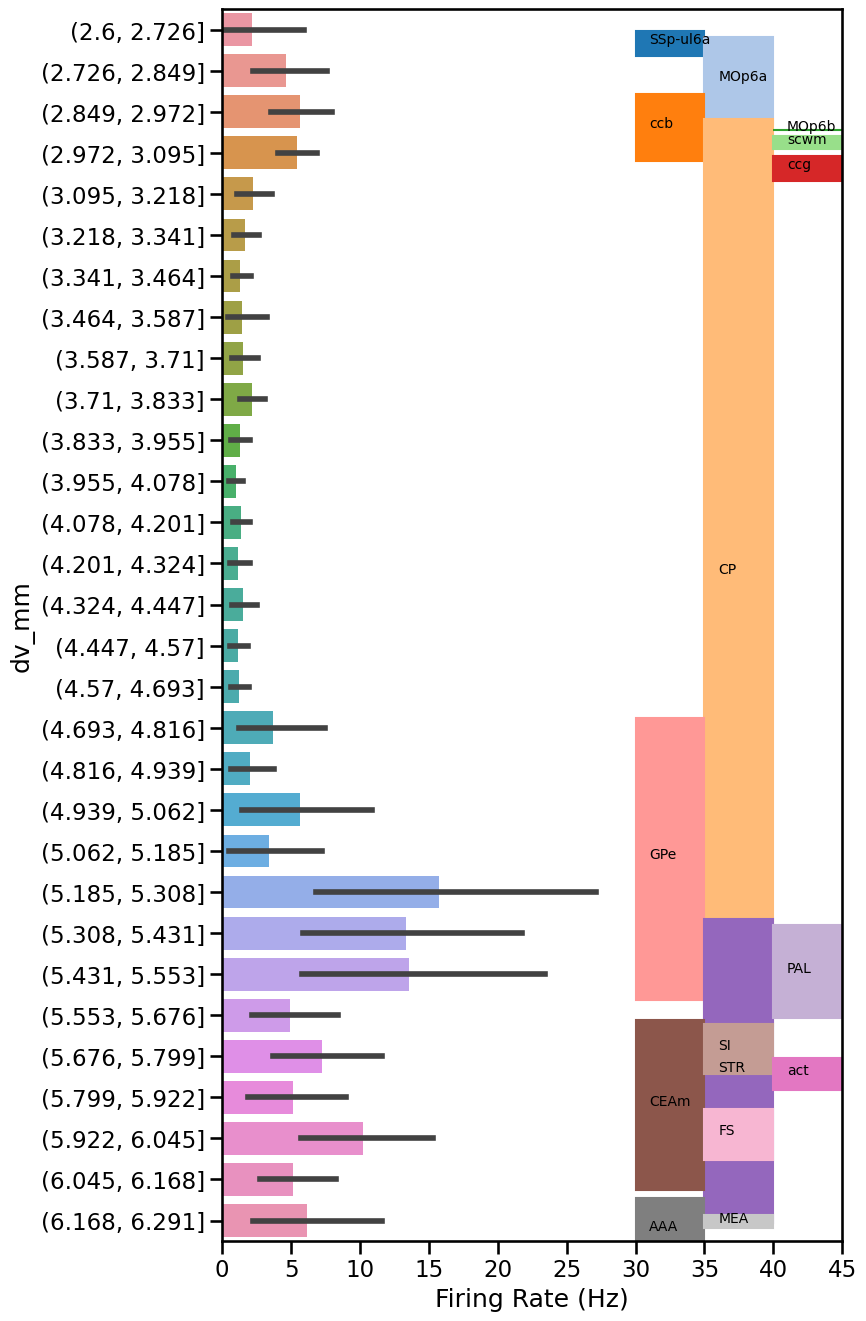

In [164]:
plt.figure(figsize=(8,len(region_boundary)*1))
ax = sns.barplot(df_cell_A, y='depth_group', x='firingRate')

# create rectangle for plotting
import matplotlib.patches as patches
colors = plt.cm.tab20.colors

rects = []
colorIdx = 0
text_list = []
dv_bin_size = np.mean(np.diff(dv_bins))

def check_text_collision(text_list, x, y, min_thres=1):
    for t in text_list:
        t_pos = np.array(t.get_position())
        dist = np.linalg.norm(t_pos - (x,y))
        if dist<min_thres:
            return True
        

for idx, row in region_boundary.iterrows():
    # convert the dv coordinates to the bin coordinates so that the plot looks right
    y = (row.min_mm - dv_bins[0])/dv_bin_size
    height = (row.max_mm - row.min_mm)/dv_bin_size
    x = 30+row.layer*5
    region = row.acronym

    rect = patches.Rectangle((x, y), 5, height, color=colors[colorIdx%len(colors)])
    ax.add_patch(rect)
    colorIdx += 1

    # also add the region text
    t = ax.text(x+1, y+height/2, region, fontsize=10)


ax.set_xlim([0,45])
ax.set(ylabel='dv_mm', xlabel='Firing Rate (Hz)')

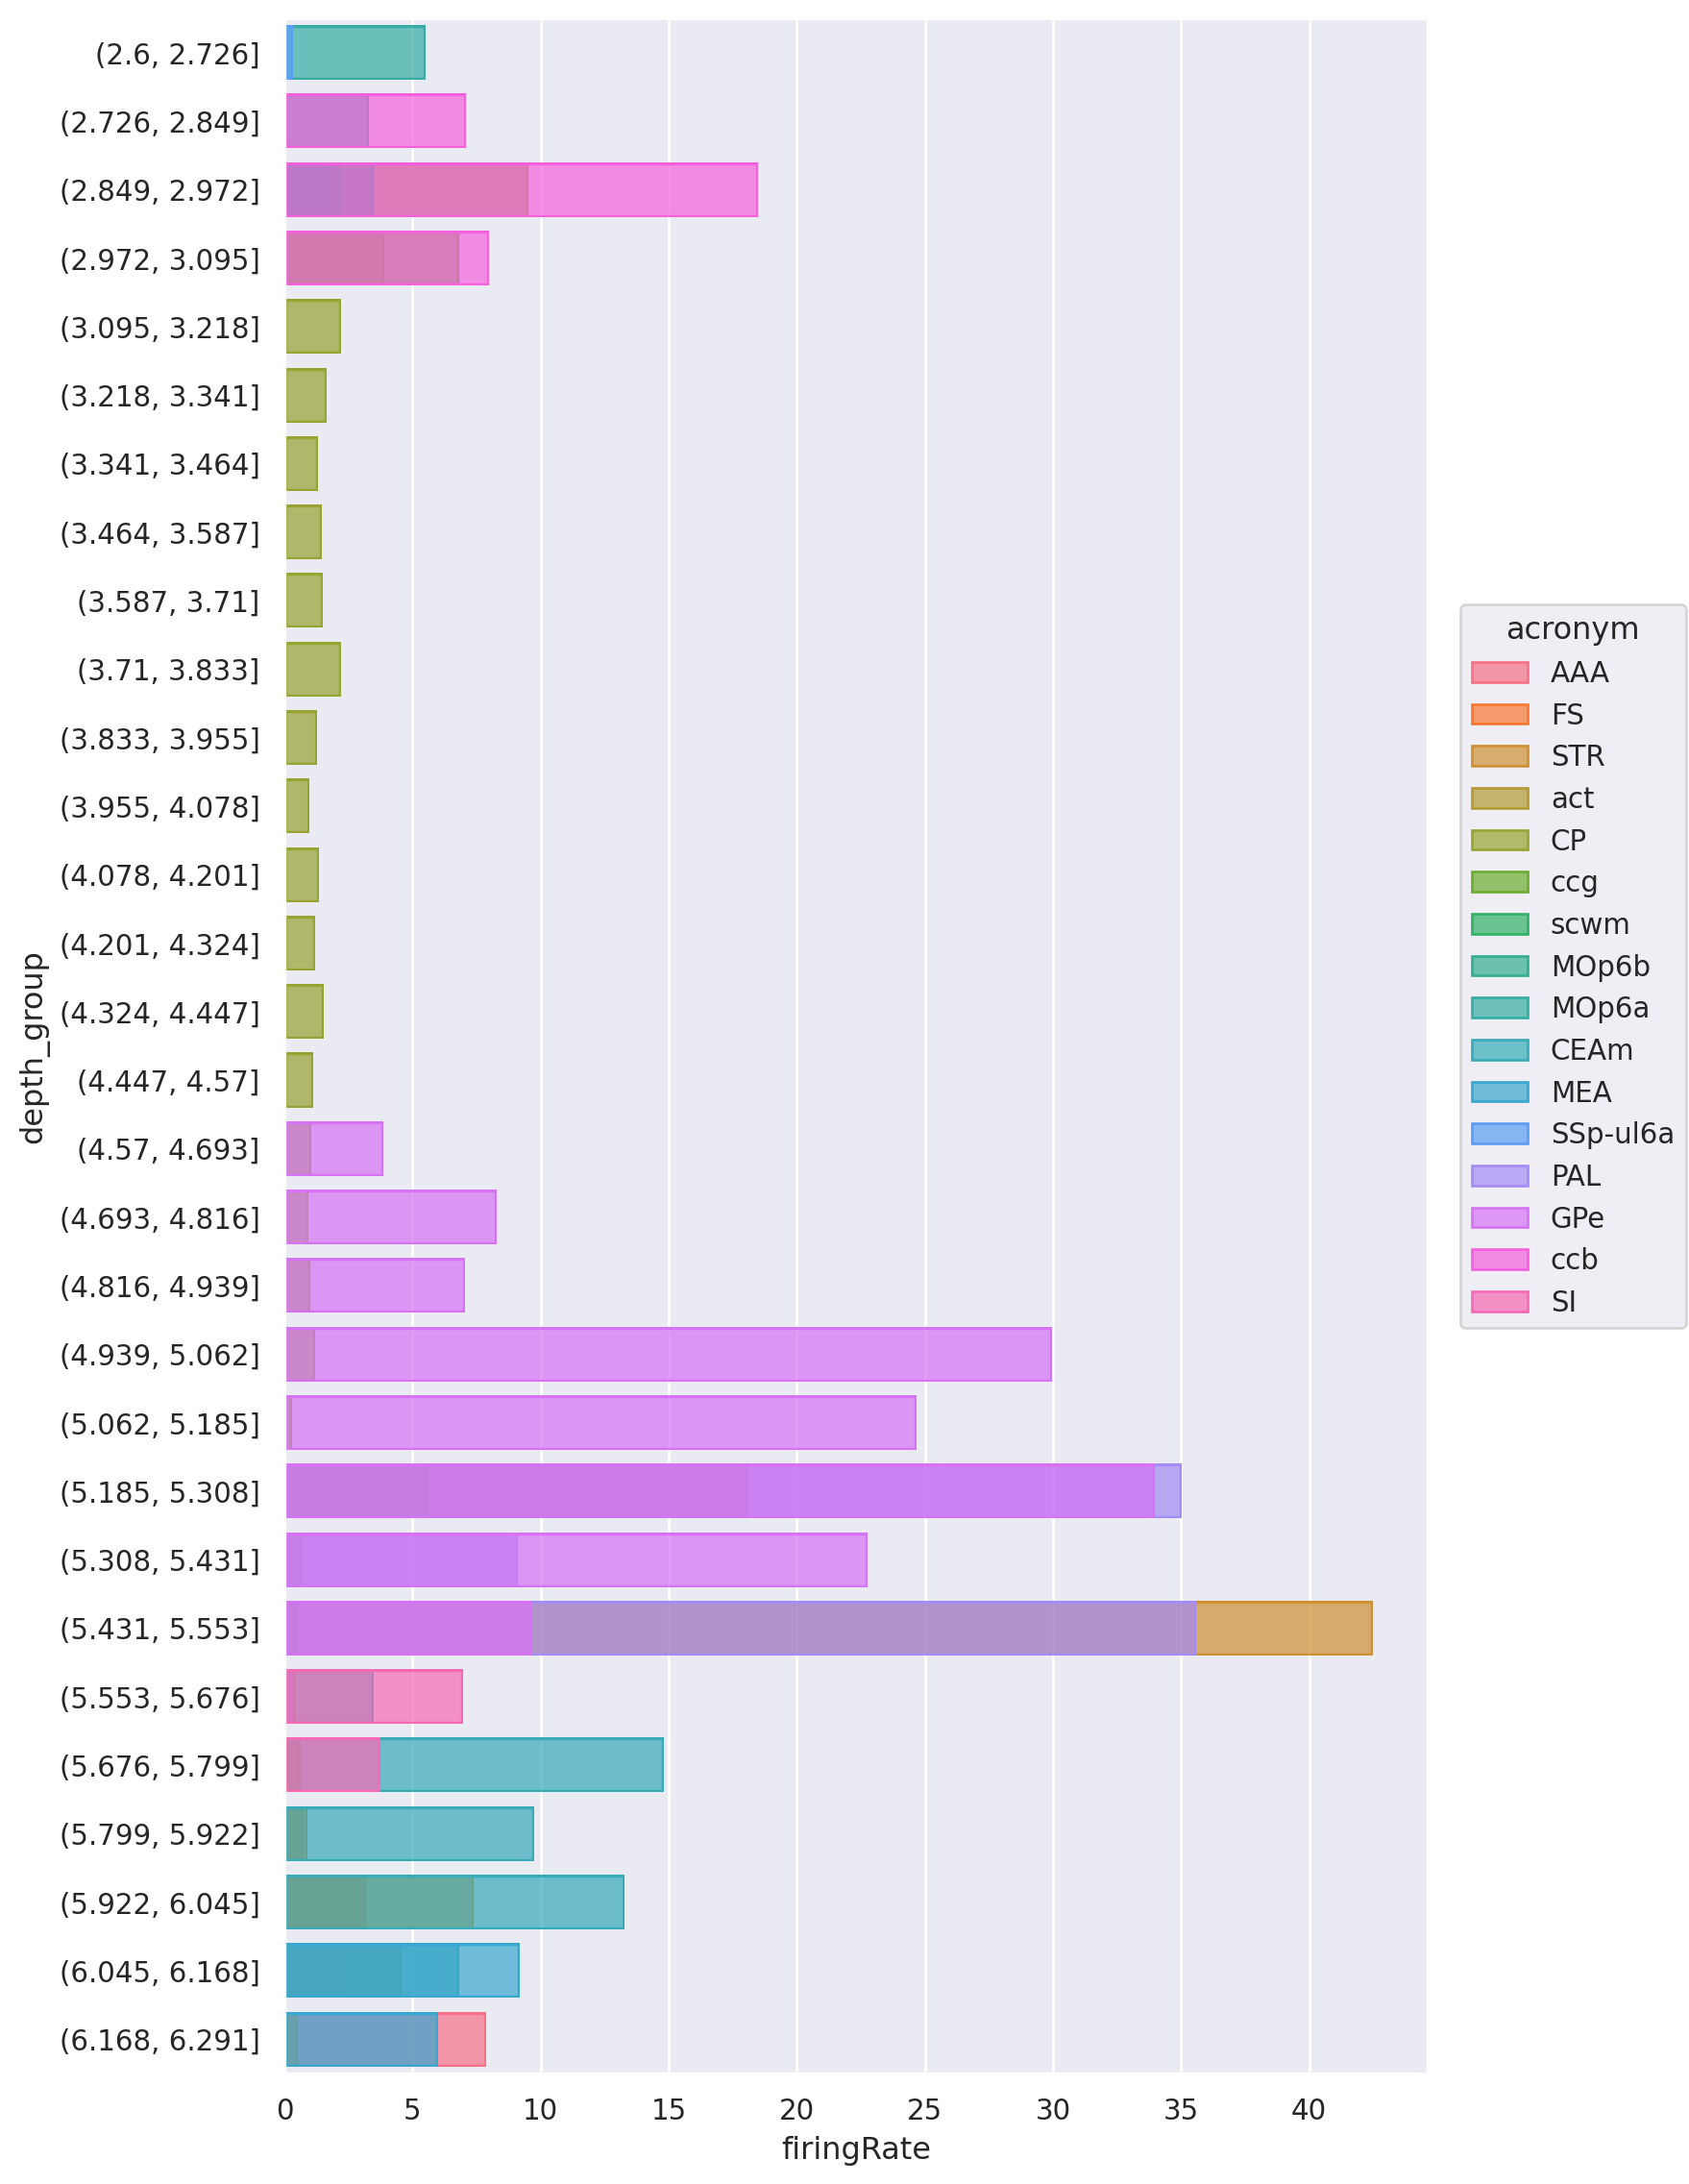

In [50]:
(so.Plot(df_cell_A, y="depth_group", x='firingRate',color='acronym')
 .add(so.Bar(), so.Agg())
 .layout(size=(8, 12))
)


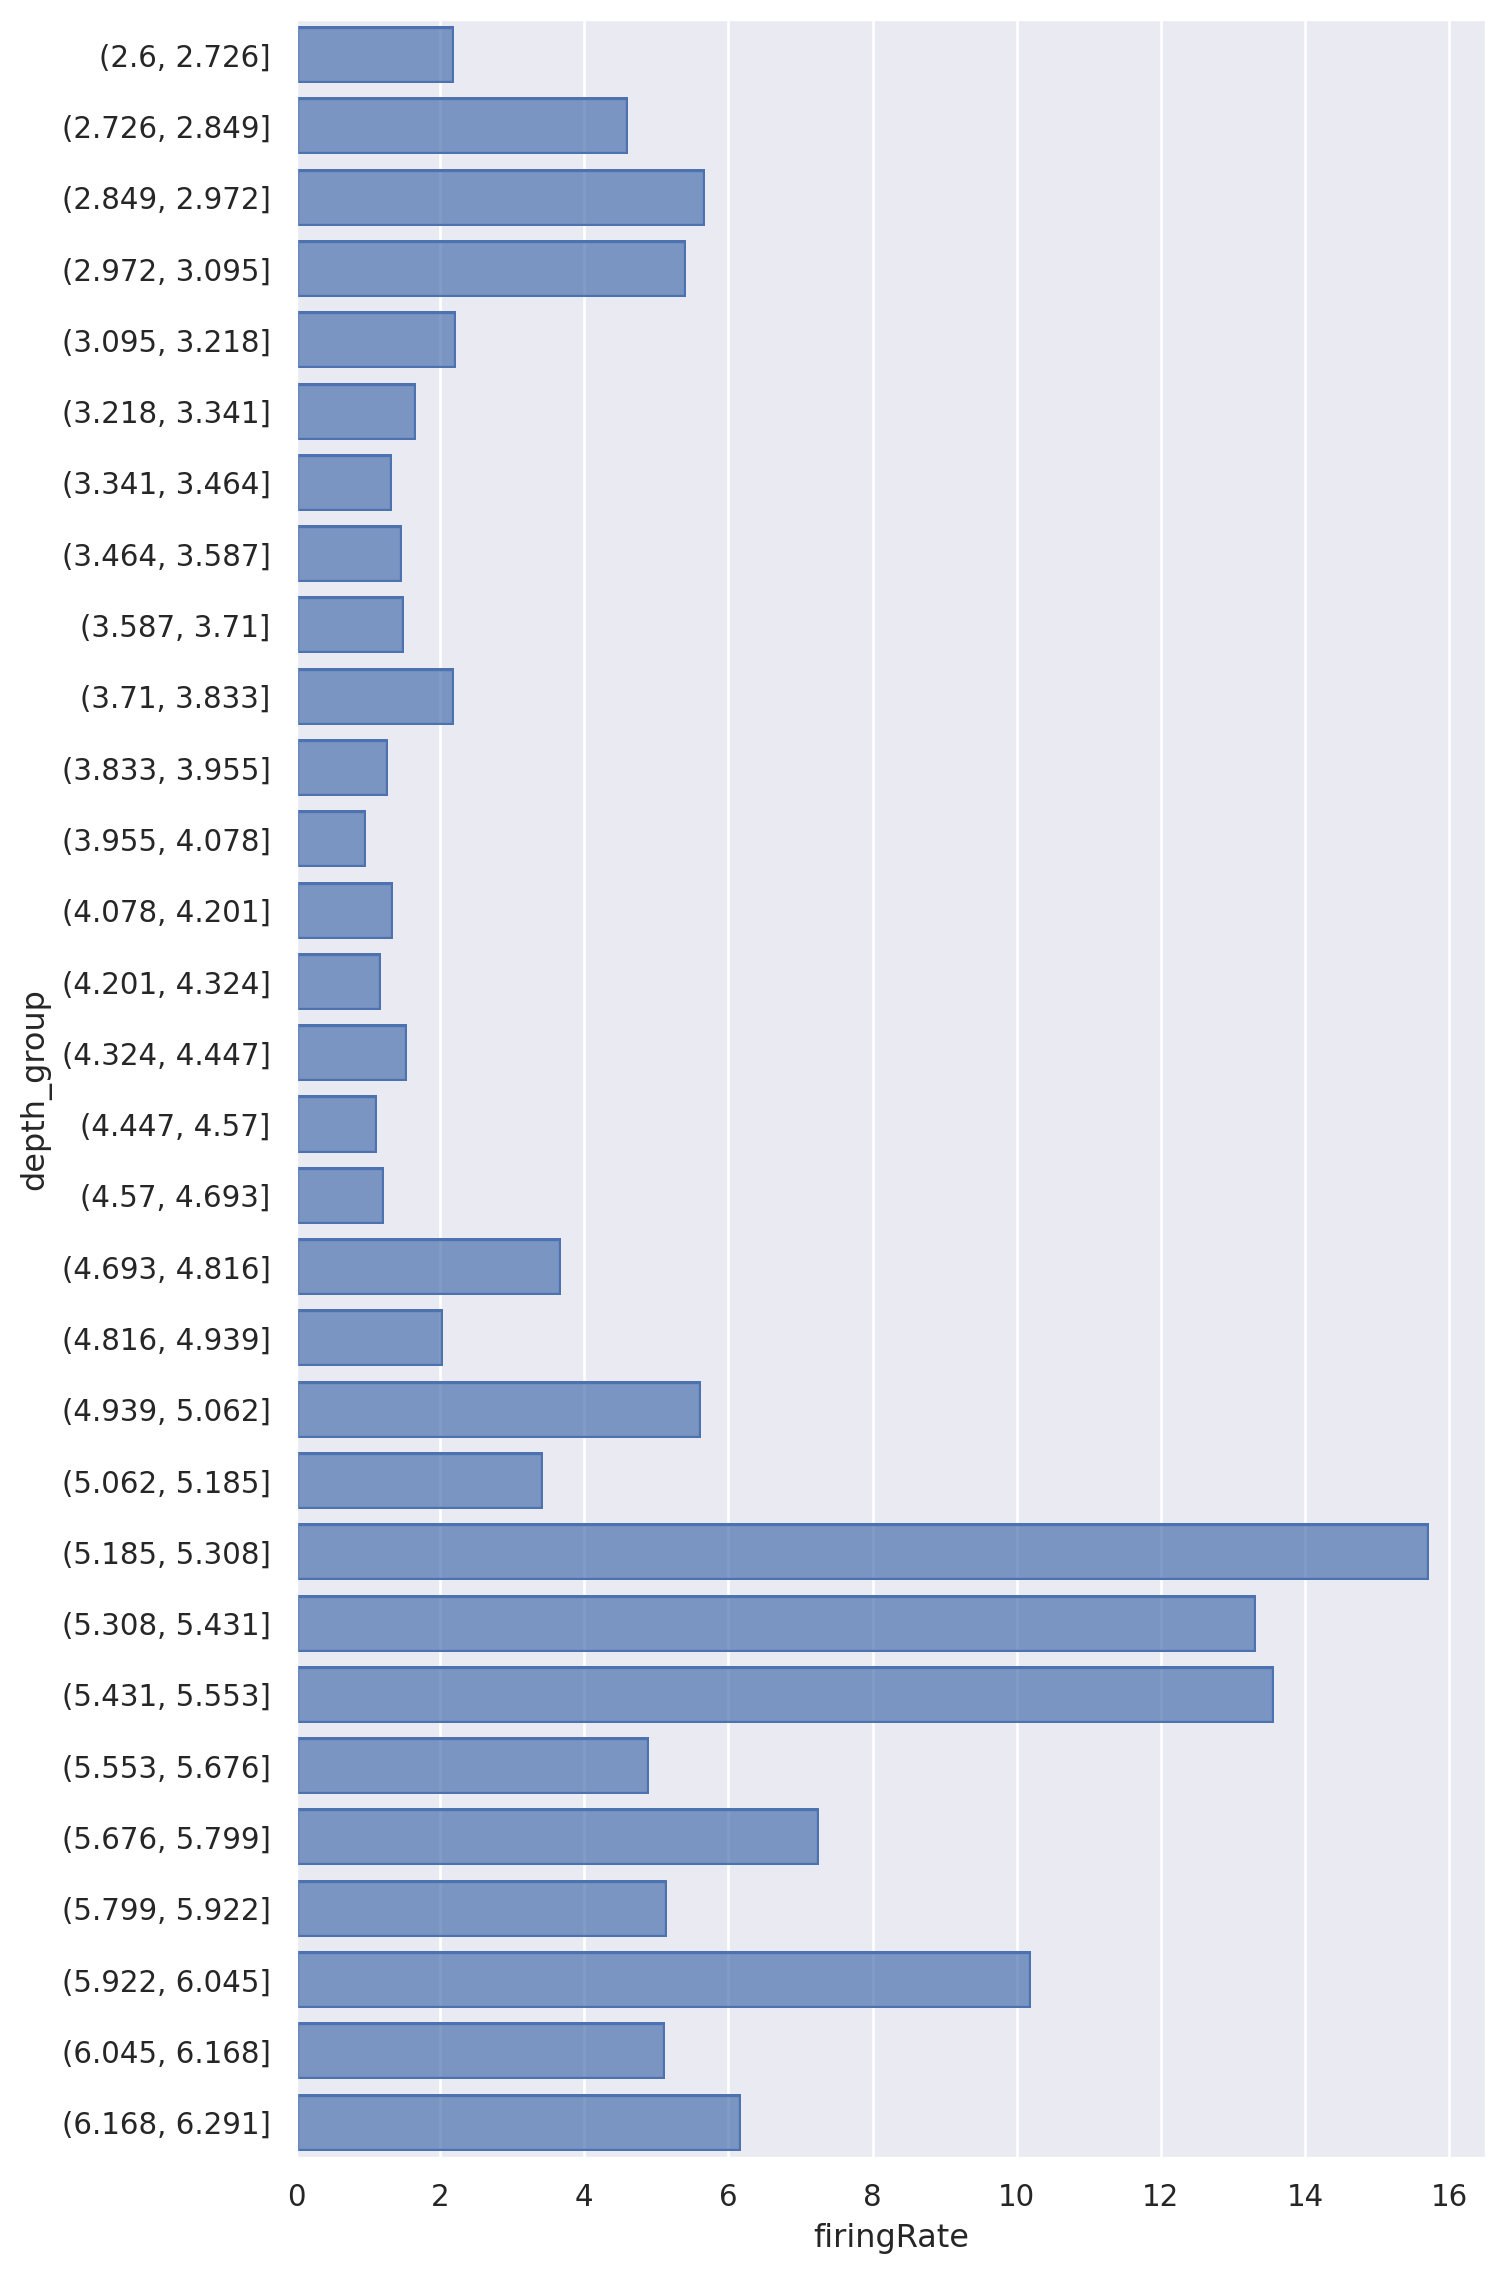

In [49]:
(so.Plot(df_cell_A, y="depth_group", x='firingRate')
 .add(so.Bar(), so.Agg())
 .layout(size=(8, 12))
)

<Axes: xlabel='firingRate', ylabel='name'>

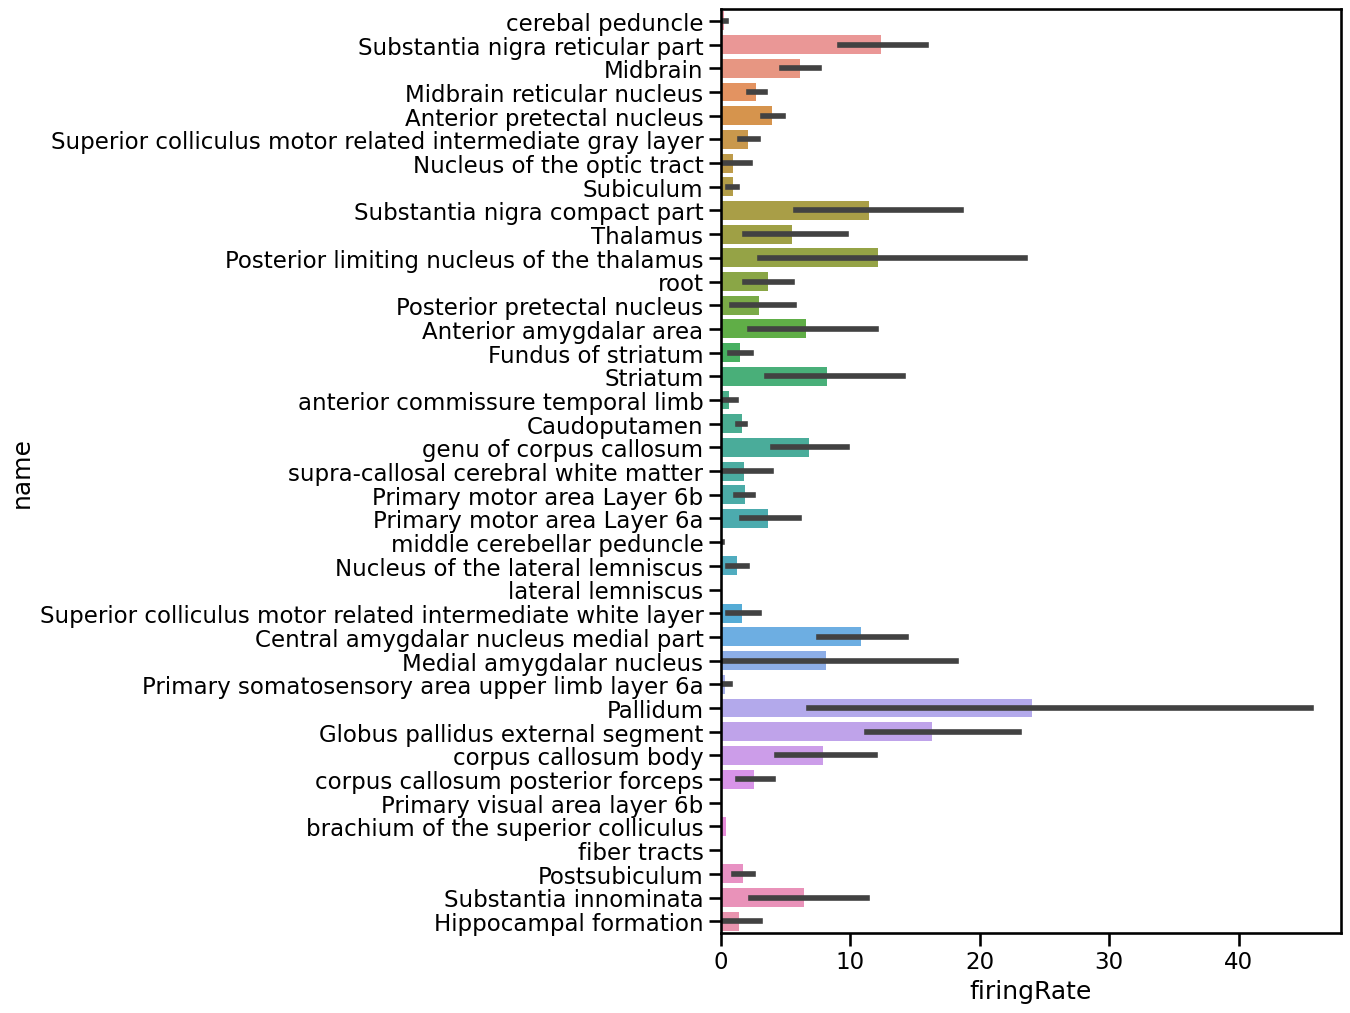

In [20]:
plt.figure(figsize=(8,12))
sns.barplot(df_cell_merge, y='name', x='firingRate')

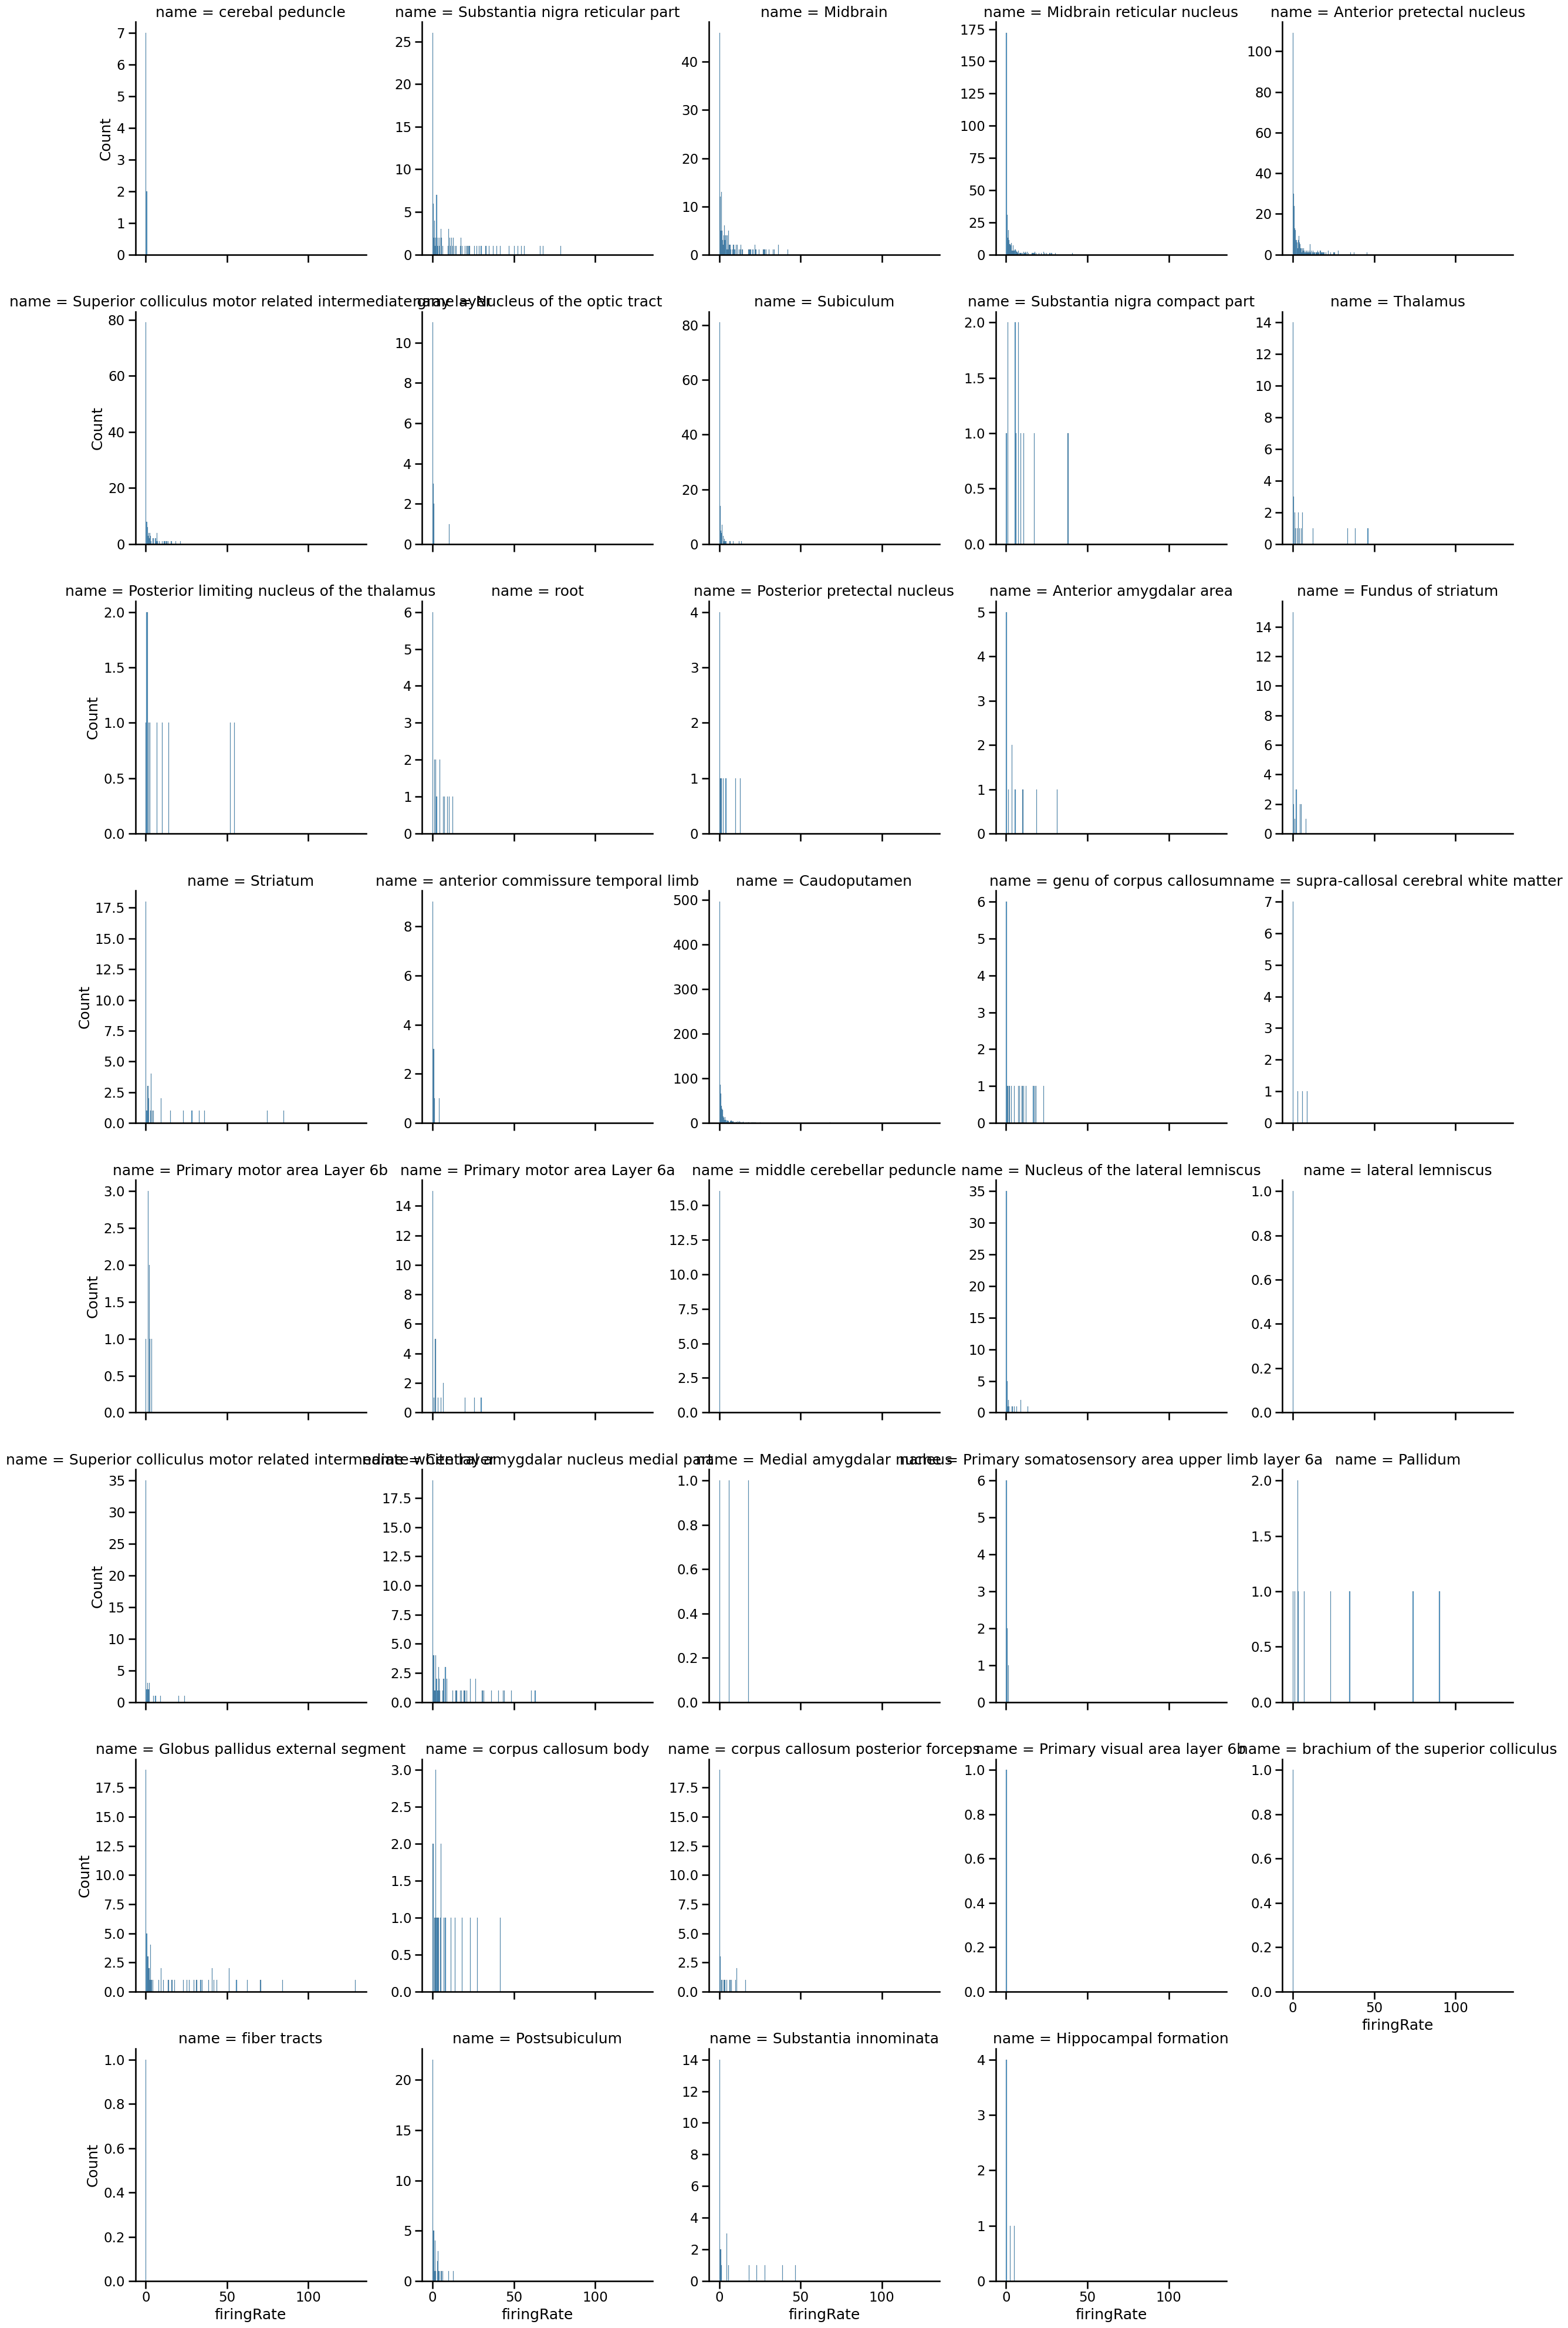

In [18]:
sns.set_context('talk')
sns.displot(df_cell_merge, col='name', col_wrap=5, x='firingRate', kind='hist', facet_kws={'sharey':False})

### Try to match with the computed location from spikeinterface